# Predict the stock price using Elastic Net Regression

In [4]:
# Import libraries

import yfinance as yf

In [6]:
# Download the data from Yahoo Finance

tickers = ['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC']
df = yf.download(tickers, start = '2020-01-01', end = '2025-04-01')['Close']
df.head()

C:\Users\sahil\AppData\Local\Temp\ipykernel_28096\178316247.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start = '2020-01-01', end = '2025-04-01')['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.538521,94.900497,152.791107,208.848969,3257.850098
2020-01-03,71.833290,93.748497,150.888611,206.935928,3234.850098
2020-01-06,72.405670,95.143997,151.278625,208.269287,3246.280029
2020-01-07,72.065147,95.343002,149.899338,208.240265,3237.179932
2020-01-08,73.224403,94.598503,152.286957,209.805466,3253.050049


In [8]:
# Feature Engineering

df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['AMZN(t-1)'] = df['AMZN'].shift(1)
df['MSFT(t-1)'] = df['MSFT'].shift(1)
df['QQQ(t-1)'] = df['QQQ'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)

In [10]:
df['AAPL(MA_5)'] = df['AAPL'].rolling(window=5).mean()
df['AMZN(MA_5)'] = df['AMZN'].rolling(window=5).mean()
df['MSFT(MA_5)'] = df['MSFT'].rolling(window=5).mean()
df['QQQ(MA_5)'] = df['QQQ'].rolling(window=5).mean()
df['^GSPC(MA_5)'] = df['^GSPC'].rolling(window=5).mean()


In [12]:
df['Target'] = df['AAPL'].shift(-1)
df.head()

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL(MA_5),AMZN(MA_5),MSFT(MA_5),QQQ(MA_5),^GSPC(MA_5),Target
Date,,,,,,,,,,,,,,,,
2020-01-02,72.538521,94.900497,152.791107,208.848969,3257.850098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.833290
2020-01-03,71.833290,93.748497,150.888611,206.935928,3234.850098,72.538521,94.900497,152.791107,208.848969,3257.850098,NaN,NaN,NaN,NaN,NaN,72.405670
2020-01-06,72.405670,95.143997,151.278625,208.269287,3246.280029,71.833290,93.748497,150.888611,206.935928,3234.850098,NaN,NaN,NaN,NaN,NaN,72.065147
2020-01-07,72.065147,95.343002,149.899338,208.240265,3237.179932,72.405670,95.143997,151.278625,208.269287,3246.280029,NaN,NaN,NaN,NaN,NaN,73.224403
2020-01-08,73.224403,94.598503,152.286957,209.805466,3253.050049,72.065147,95.343002,149.899338,208.240265,3237.179932,72.413406,94.746899,151.428928,208.419983,3245.842041,74.779739


In [14]:
df = df.dropna()

In [16]:
# Steps for Elastic Net Regression

# 1. Import libraries
# 2. Define features and Target variables
# 3. Train Test split data
# 4. Apply Elastic Net Regression
# 5. Get Intercept & co-eff for Elastic Net Regression
# 6. Predict using Elastic Net Regression
# 7. Create a dataframe with Actual and Predicted values
# 8. Plot the graph between Actual and Predicted Prices
# 9. Evaluate the model - R Square, Mse, RMSE

In [24]:
# 1. Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
# 2. Define features and Target variables

X = df[ ['AAPL(t-1)', 'AMZN(t-1)',
       'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL(MA_5)', 'AMZN(MA_5)',
       'MSFT(MA_5)', 'QQQ(MA_5)', '^GSPC(MA_5)' ] ]

Y = df['Target']

In [28]:
# 3. Train Test split data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.05, shuffle = False)

In [48]:
# 4. Apply Elastic Net Regression

elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.5)
elastic_net.fit(X_train, Y_train)

C:\Users\sahil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.450e+03, tolerance: 2.120e+02
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=1)

In [50]:
# 5. Get Intercept & co-eff for Elastic Net Regression

co_eff = elastic_net.coef_
intercept = elastic_net.intercept_

co_effi = pd.DataFrame( { 'Features': X.columns, 'Co_eff': co_eff} )
co_effi

,Features,Co_eff
0,AAPL(t-1),0.529474
1,AMZN(t-1),0.000297
2,MSFT(t-1),0.010726
3,QQQ(t-1),0.002963
4,^GSPC(t-1),0.006583
5,AAPL(MA_5),0.447737
6,AMZN(MA_5),0.000000
7,MSFT(MA_5),0.000000
8,QQQ(MA_5),0.000000
9,^GSPC(MA_5),-0.006781


In [52]:
# 6. Predict using Elastic Net Regression

y_pred = elastic_net.predict(X_test)
y_pred

array([248.90269733, 252.32445673, 253.4565508 , 256.25687319,
       257.03549839, 254.51186561, 251.91316406, 249.71050403,
       244.85586431, 244.2095854 , 244.46386541, 241.7288177 ,
       241.50334709, 237.07637353, 234.95432112, 233.94690454,
       235.90808318, 229.88210732, 229.91646239, 225.22141699,
       224.80672597, 224.2275804 , 223.5790595 , 227.95087851,
       234.35522787, 236.00096817, 236.25299378, 235.0707531 ,
       230.04930367, 232.25239997, 231.84200896, 231.69187735,
       228.16891827, 228.58926991, 231.64449614, 234.47709482,
       238.81072319, 241.82985183, 242.86719727, 243.94103481,
       244.78566003, 244.23259187, 245.25607938, 244.80774952,
       240.89364974, 238.28265512, 240.73530526, 237.15503241,
       235.3123123 , 235.78042702, 234.79380269, 236.32615701,
       227.91319842, 222.78091742, 218.97093384, 212.42124193,
       214.0596142 , 213.79139725, 212.36243304, 214.37706815,
       214.0660286 , 216.82736723, 219.60607379, 221.80

In [54]:
# 7. Create a dataframe with Actual and Predicted values

last = pd.DataFrame( { 'Actual': Y_test, 'Predict': y_pred } )
last

,Actual,Predict
Date,,
2024-12-20,254.367035,248.902697
2024-12-23,257.286682,252.324457
2024-12-24,258.103729,253.456551
2024-12-26,254.685883,256.256873
2024-12-27,251.307861,257.035498
...,...,...
2025-03-24,223.203659,216.827367
2025-03-25,220.989059,219.606074
2025-03-26,223.303406,221.804019


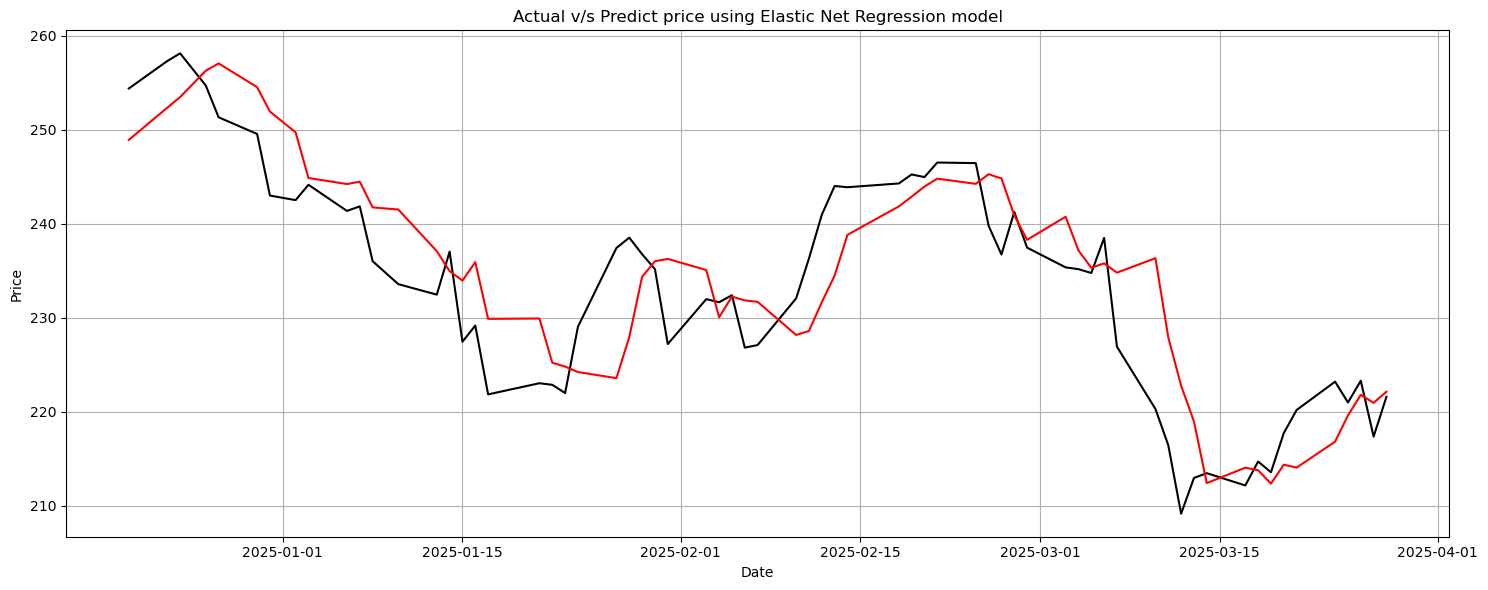

In [56]:
# 8. Plot the graph between Actual and Predicted Prices

plt.figure(figsize = (15,6))
plt.plot(last.index, last['Actual'], label = 'Actual', color = 'Black')
plt.plot(last.index, last['Predict'], label = 'Predict', color = 'Red')
plt.title('Actual v/s Predict price using Elastic Net Regression model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
# 9. Evaluate the model - R Square, MSE, RMSE

r2 = r2_score(Y_test, y_pred)
print('R2 =', r2)

mse = mean_squared_error(Y_test, y_pred)
print('MSE =', mse)

rmse = np.sqrt(mse)
print('RMSE =', rmse)

R2 = 0.7513322121619855
MSE = 35.00313196605993
RMSE = 5.9163444766223625
